# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file= 'dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset. (Should return 43)

from collections import Counter
counter_train = Counter()
counter_valid = Counter()
counter_test = Counter()
for item in y_train:
    counter_train[item] += 1

for item in y_valid:
    counter_valid[item] += 1

for item in y_test:
    counter_test[item] += 1
print(counter_train) 
print(counter_valid) 
print(counter_test) 
print(len(y_train))

    
    


n_classes = len(counter_train)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 18: 1080, 35: 1080, 17: 990, 14: 690, 31: 690, 33: 599, 15: 540, 26: 540, 28: 480, 23: 450, 30: 390, 6: 360, 16: 360, 34: 360, 22: 330, 36: 330, 20: 300, 40: 300, 21: 270, 39: 270, 24: 240, 29: 240, 27: 210, 32: 210, 41: 210, 42: 210, 0: 180, 19: 180, 37: 180})
Counter({1: 240, 2: 240, 13: 240, 4: 210, 5: 210, 10: 210, 12: 210, 38: 210, 3: 150, 7: 150, 8: 150, 9: 150, 11: 150, 25: 150, 17: 120, 18: 120, 35: 120, 14: 90, 15: 90, 31: 90, 33: 90, 6: 60, 16: 60, 20: 60, 21: 60, 22: 60, 23: 60, 26: 60, 28: 60, 30: 60, 34: 60, 36: 60, 40: 60, 0: 30, 19: 30, 24: 30, 27: 30, 29: 30, 32: 30, 37: 30, 39: 30, 41: 30, 42: 30})
Counter({2: 750, 1: 720, 13: 720, 12: 690, 38: 690, 4: 660, 10: 660, 5: 630, 9: 480, 25: 480, 3: 450, 7: 450, 8: 450, 11: 420, 18: 390, 35: 390, 17: 360, 14: 270, 31: 270, 15: 210, 33: 210, 26: 180, 6: 150, 16: 150, 23: 150, 28: 150, 30

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

11


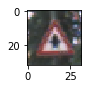

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [21]:
def augment_dataset(X, y, max_case):
    '''
    Augment a dataset. The resulting dataset will contain equal number of cases for each given classification
    '''
    counter_selection = Counter()
    X_selected = []
    y_selected = []
    label_index_dict = {} # Store the indices of all the images belong to one particular label
    
    for i, item in enumerate(y):
        if counter_selection[item] < max_case:
            counter_selection[item] += 1
            X_selected.append(X[i])
            y_selected.append(item)

        if item not in label_index_dict:
            label_index_dict[item] = []

        label_index_dict[item].append(i)
    print(counter_selection)



    for index, num in counter_selection.items():
        if num < max_case:
            # Adding fake data until it has 1000 images
            for _ in range(num, max_case, 1):
                X_selected.append(add_fake_image(index, label_index_dict)) # Add a random image in this label
                y_selected.append(index)
    return X_selected, y_selected, label_index_dict

In [23]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from tqdm import tqdm
import random

def rgb2gray(rgb):
    return [np.dot(rgb[...,:3], [0.299, 0.587, 0.114])]

def add_fake_image(index, label_index_dict):
    img = X_train[random.choice(label_index_dict[index])]
    # Add noise to the fake image
    img_new = np.array([x + (random.random() - 0.5) / 10 for x in img])
    return img_new


# counter_selection = Counter()
# X_train_selected = []
# y_train_selected = []
# label_index_dict = {}
# for i, item in enumerate(y_train):
        
#     if counter_selection[item] < 2000:
#         counter_selection[item] += 1
#         X_train_selected.append(X_train[i])
#         y_train_selected.append(item)
        
#     if item not in label_index_dict:
#         label_index_dict[item] = []
        
#     label_index_dict[item].append(i)
        
# print(counter_selection)


# for index, num in counter_selection.items():
#     if num < 2000:
#         # Adding fake data until it has 1000 images
#         for _ in range(num, 2000, 1):
#             X_train_selected.append(add_fake_image(index)) # Add a random image in this label
#             y_train_selected.append(index)

X_train_augmented, y_train_augmented, label_index_dict = augment_dataset(X_train, y_train, 2000)
# X_valid_augmented, y_valid_augmented = augment_dataset(X_valid, y_valid, 80)
# X_test_augmented, y_test_augmented= augment_dataset(X_test, y_test, 240)

            


#augment the validation set
X_valid_aug = [x for x in X_valid]
y_valid_aug = [y for y in y_valid]

for y in y_valid:
    X_valid_aug.append(add_fake_image(y, label_index_dict))
    y_valid_aug.append(y)
    
X_valid_augmented = X_valid_aug
y_valid_augmented = y_valid_aug


# augment the test set
X_test_aug = [x for x in X_test]
y_test_aug = [y for y in y_test]

for y in y_test:
    X_test_aug.append(add_fake_image(y, label_index_dict))
    y_test_aug.append(y)
    
X_test_augmented = X_test_aug
y_test_augmented = y_test_aug
    


# Code for testing 

# counterr = Counter()
# for item in y_train_selected:
#     counterr[item] += 1
# print(counterr) 






    



# Normalize X train to between -1 and 1
# Since this a uint8, numbers less than 128 minus 128 will overflow to plus 128
X_train_normalized = [(np.int8(x - 128)) / 128 for x in X_train_selected] # This just works ...
X_valid_normalized = [(np.int8(x - 128)) / 128 for x in X_valid_augmented] 
X_test_normalized = [(np.int8(x - 128)) / 128 for x in X_test_augmented] 


# Convert to grayscale, the result is really counterintuitive
print(X_valid_normalized[0][0][0])

X_train_grayscale = np.array([rgb2gray(img) for img in X_train_normalized]).reshape(-1,32,32,1)
X_valid_grayscale = np.array([rgb2gray(img) for img in X_valid_normalized]).reshape(-1,32,32,1)
X_test_grayscale = np.array([rgb2gray(img) for img in X_test_normalized]).reshape(-1,32,32,1)

print(X_train_grayscale.shape)
print(X_valid_grayscale.shape)
print(X_test_grayscale.shape)









            
            




Counter({2: 2000, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 18: 1080, 35: 1080, 17: 990, 14: 690, 31: 690, 33: 599, 15: 540, 26: 540, 28: 480, 23: 450, 30: 390, 6: 360, 16: 360, 34: 360, 22: 330, 36: 330, 20: 300, 40: 300, 21: 270, 39: 270, 24: 240, 29: 240, 27: 210, 32: 210, 41: 210, 42: 210, 0: 180, 19: 180, 37: 180})
[-0.8984375 -0.90625   -0.90625  ]
(86000, 32, 32, 1)
(8820, 32, 32, 1)
(25260, 32, 32, 1)


### Model Architecture

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

## TODO: Use dropout layer

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print(conv1)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv1)

    conv11 = tf.nn.dropout(conv1, 1)
    
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv11, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print(conv2)
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv2)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    print(fc0)
    fc01 = tf.nn.dropout(fc0, 1)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc01, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    print(fc1)

    fc11 = tf.nn.dropout(fc1, 1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc11, fc2_W) + fc2_b
#     return fc2, conv1_W, conv2_W, fc1_W, fc2_W 
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    print(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    print(logits)
    
    
    return logits, conv1_W, conv2_W, fc1_W, fc2_W, fc3_W 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Training Pipeline

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf
# Set the placeholders for features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Hyperparameters
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 128
beta = 0.001

# Training Pipeline
logits, weights_1, weights_2, weights_3, weights_4, weights_5 = LeNet(x)
prediction = tf.nn.top_k(tf.nn.softmax(logits),5)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
# Apply L2 Regularization
regularizers = tf.nn.l2_loss(weights_1) + tf.nn.l2_loss(weights_2) + \
                   tf.nn.l2_loss(weights_3) + tf.nn.l2_loss(weights_4) + tf.nn.l2_loss(weights_5)
                   
loss_operation = tf.reduce_mean(loss_operation + beta * regularizers)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples






Tensor("add_30:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("MaxPool_6:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("add_31:0", shape=(?, 10, 10, 16), dtype=float32)
Tensor("MaxPool_7:0", shape=(?, 5, 5, 16), dtype=float32)
Tensor("Flatten_3/Reshape:0", shape=(?, 400), dtype=float32)
Tensor("Relu_14:0", shape=(?, 120), dtype=float32)
Tensor("Relu_15:0", shape=(?, 84), dtype=float32)
Tensor("add_34:0", shape=(?, 43), dtype=float32)


## Train

In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_grayscale, y_train_augmented = shuffle(X_train_grayscale, y_train_augmented)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_grayscale[offset:end], y_train_augmented[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_grayscale, y_valid_augmented)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.874

EPOCH 2 ...
Validation Accuracy = 0.928

EPOCH 3 ...
Validation Accuracy = 0.929

EPOCH 4 ...
Validation Accuracy = 0.946

EPOCH 5 ...
Validation Accuracy = 0.949

EPOCH 6 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Validation Accuracy = 0.952

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.948

EPOCH 10 ...
Validation Accuracy = 0.955

EPOCH 11 ...
Validation Accuracy = 0.962

EPOCH 12 ...
Validation Accuracy = 0.958

EPOCH 13 ...
Validation Accuracy = 0.961

EPOCH 14 ...
Validation Accuracy = 0.956

EPOCH 15 ...
Validation Accuracy = 0.961

EPOCH 16 ...
Validation Accuracy = 0.962

EPOCH 17 ...
Validation Accuracy = 0.968

EPOCH 18 ...
Validation Accuracy = 0.960

EPOCH 19 ...
Validation Accuracy = 0.955

EPOCH 20 ...
Validation Accuracy = 0.958

EPOCH 21 ...
Validation Accuracy = 0.969

EPOCH 22 ...
Validation Accuracy = 0.971

EPOCH 23 ...
Validation Accuracy = 0.965

EPOCH 24 ...
Validation Accura

## Test (Only Run this Once Or Clear Kernel)

In [28]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_grayscale, y_test_augmented)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.955


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

## Helper Functions

In [ ]:
# load the csv file to map the number to traffic sign name
import csv
sign_dict = {}
with open('signnames.csv', 'r') as csvfile:
    signreader = csv.reader(csvfile)
    line_count = 0
    for row in signreader:
        if line_count > 0:
            sign_dict[row[0]] = row[1]
        line_count += 1
        
    

### Load and Output the Images

In [ ]:
import matplotlib.image as mpimg
from PIL import Image
def load_images(file_names = None, labelss = None):
    images = []
    labels = []
    
    # if file names is not passed in, use the test dataset
    if file_names == None:
        for _ in range(5):
            index = random.randint(0, len(X_test))
            image = X_test[index].squeeze()
            labels.append(y_test[index])
            images.append(image)
    
    # if file names is passed in, use images from outside source
    else:
        for fn, l in zip(file_names, labelss):
            images.append(Image.open(fn))
            labels.append(l)
        
    
    for i, img in enumerate(images):
        plt.figure(figsize=(1,1))
        plt.imshow(img)
        print("{} : {}".format(labels[i], sign_dict[str(labels[i])]))
        
    return images, labels
    

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
def predict_images(images, labels, need_resize = False):
    # Preprocessing
    if need_resize:
        resized_images = [np.asarray(i.resize((32,32))) for i in images]
    else:
        resized_images = images
    #print(resized_images)
    # Normalize the images
    normalized_images = np.array([(np.int8(x - 128)) / 128 for x in resized_images])

    # Grayscale the images
    grayscaled_images = np.array([rgb2gray(img) for img in normalized_images]).reshape(-1,32,32,1)

    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        result = sess.run(prediction, feed_dict={x: grayscaled_images})
        performance = sess.run(accuracy_operation, feed_dict={x: grayscaled_images, y:labels})
        print("accuracy : {}".format(performance))
        for i, (img_prediction, probs) in enumerate(zip(result.indices, result.values)):
            print("Image" + str(i + 1))
            for pre, prob in zip(img_prediction, probs):
                print("{} : {}".format(sign_dict[str(pre)], prob))

            print("")

## Part 0: Test The Images From The Test Dataset To Get Baseline Results

In [ ]:
# grab 5 images from the dataset
# Visualizations will be shown in the notebook.
%matplotlib inline
images, labels = load_images()


### Predict the Sign Type for Each Image

In [ ]:
predict_images(images, labels)


## Part 1: Test 5 Pure German Traffic Signs Images From Wikipedia
From https://en.wikipedia.org/wiki/Road_signs_in_Germany

In [ ]:
import os
dir_str = "dataset/wikipedia"
str_after = os.listdir(dir_str)
file_names = [dir_str + "/" + s for s in str_after]
labels = [3,35,33,18,14]
images, labels = load_images(file_names, labels)



In [ ]:
predict_images(images, labels, True)

## Part 2: Test 5 Cropped Real Images

In [ ]:
dir_str = "dataset/croppedimgs"
str_after = os.listdir(dir_str)
file_names = [dir_str + "/" + s for s in str_after]
labels = [14,30,4,38,1]
images, labels = load_images(file_names, labels)

In [ ]:
predict_images(images, labels, True)

## Part 3: Test 5 Full Images 

In [ ]:
dir_str = "dataset/fullimgs"
str_after = os.listdir(dir_str)
file_names = [dir_str + "/" + s for s in str_after]
labels = [4,14,30,38,1]
images, labels = load_images(file_names, labels)

In [ ]:
predict_images(images, labels, True)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")